<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/08_Introduction_to_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

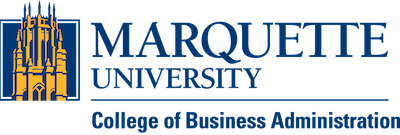

#BUAN4060: Unstructured Data Analytics

##08 Introduction to Unsupervised Learning

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



##1. Introduction

In **unsupervised learning (UML)**, no labels are provided, and the learning algorithm focuses solely on detecting structure in unlabelled input data. One generally differentiates between

- **Clustering**: where the goal is to find homogeneous subgroups within the data; the grouping is based on distance between observations

- **Dimensionality reduction**: where the goal is to identify patterns in the features of the data. Dimensionality reduction is often used to facilitate visualisation of the data, as well as a pre-processing method before supervised learning

UML presents specific challenges and benefits:

- there is no single goal in UML
- there is generally much more unlabelled data available than labelled data

##2. K-means Clustering

The k-means clustering algorithms aims at partitioning n observations into a fixed number of k clusters

The algorithm will find homogeneous clusters

In R, we use:

      stats::kmeans(x, centers = 3, nstart = 10)

Where:

- x is a numeric data matrix
- centers is the pre-defined number of clusters
- the k-means algorithm has a random component and can be repeated nstart times to improve the returned model

**Exercise:**

  - To learn about k-means, let’s use the iris dataset with the sepal and petal length variables only (to facilitate visualisation). Create such a data matrix and name it x
  - Run the k-means algorithm on the newly generated data x, save the results in a new variable cl, and explore its output when printed.
  - The actual results of the algorithms, i.e. the cluster membership can be accessed in the clusters element of the clustering result output. Use it to colour the inferred clusters to generate a figure like that shown below.

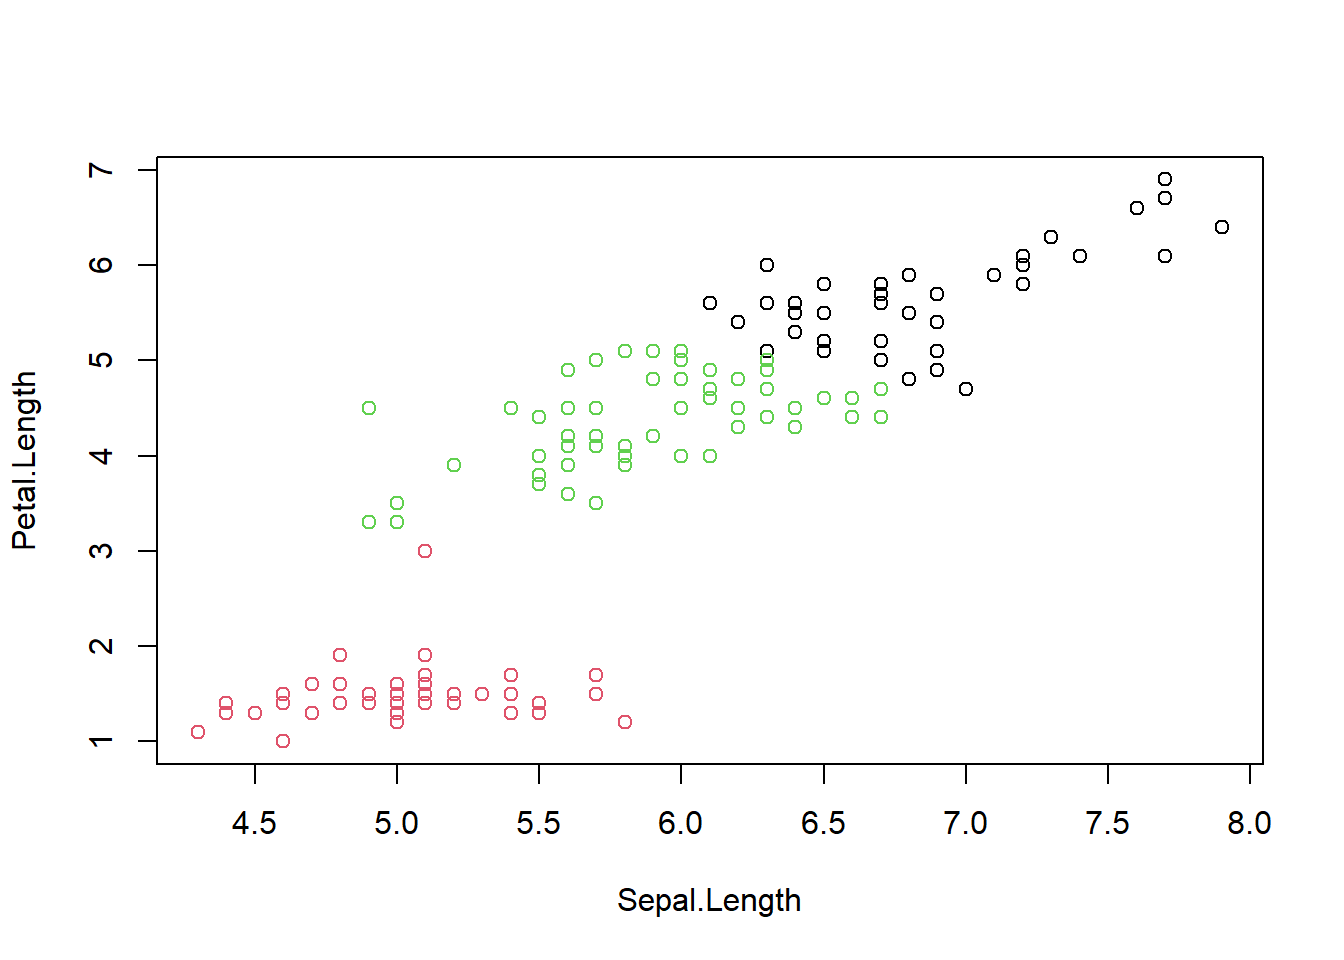

k-means algorithm on sepal and petal lengths:

      i <- grep("Length", names(iris))
      x <- iris[, i]
      cl <- kmeans(x, 3, nstart = 10)
      plot(x, col = cl$cluster)

##3. How does K-Means work

**Initialisation:** randomly assign class membership

In [ ]:
# Load the dataset from the existing dataset built in R
# To view a full list of these datasets, type Library( help = "datasets")

install.packages("datasets")
data(iris)
summary(iris)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

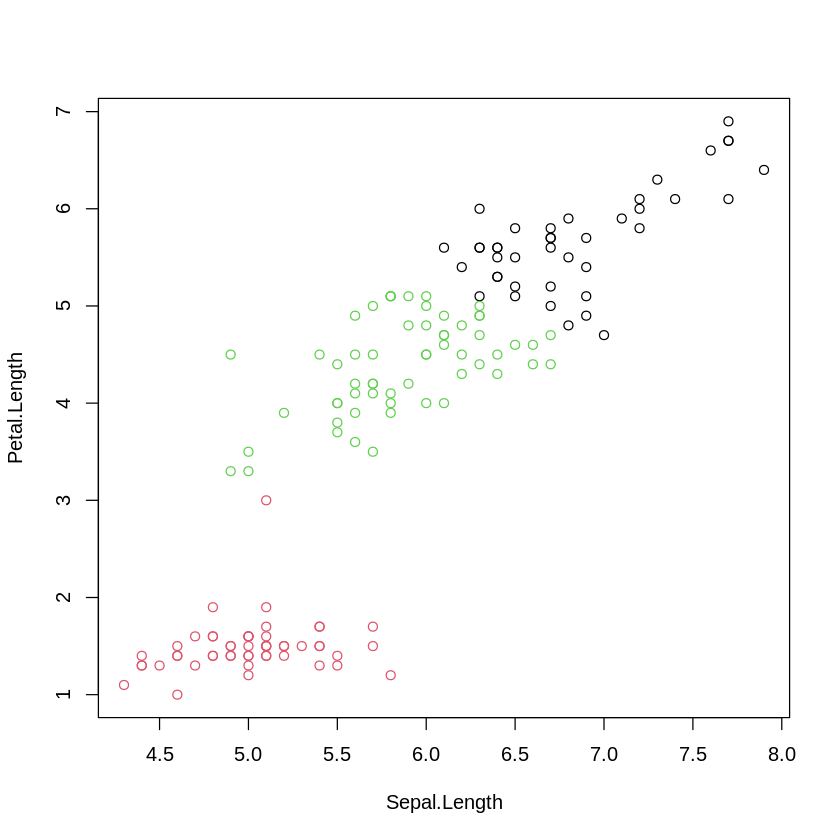

In [ ]:
i <- grep("Length", names(iris)) # find the indices of columns in the "iris" dataset where the column names contain the word "Length
# The grep function is used to search for a pattern, and names(iris) retrieves the column names of the "iris" dataset
# In this case, it identifies the indices of columns related to length.

x <- iris[, i] # create a new data frame x by subsetting the "iris" dataset to include only the columns identified in step 1, these columns are related to length

cl <- kmeans(x, 3, nstart = 10) # perform k-means clustering on the subset of the "iris" dataset stored in x. It aims to find three clusters (k = 3) using the k-means algorithm
# nstart = 10 parameter specifies that the algorithm should be run ten times with different initializations to find the best clustering result

plot(x, col = cl$cluster) # create a scatter plot of the data points in the x data frame

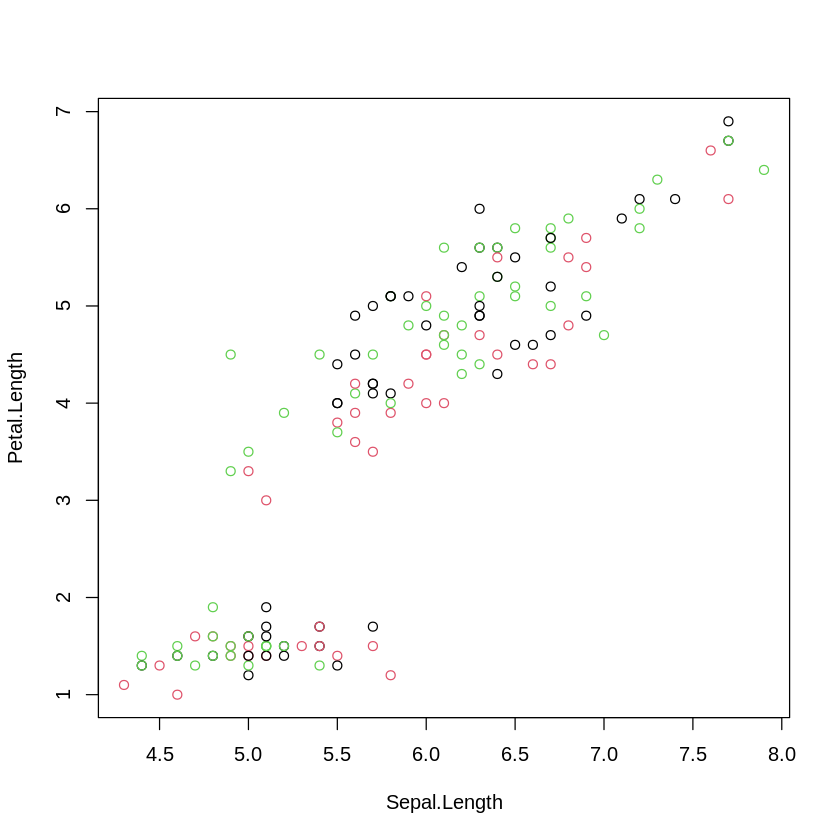

In [ ]:
set.seed(12)
init <- sample(3, nrow(x), replace = TRUE) # Generate a vector "init" of random integers. It samples from the values 1 to 3 (representing the cluster numbers) for each data point
                                           # The nrow(x) specifies the number of data points, and replace = TRUE allows for sampling with replacement,
                                           # meaning the same value can be sampled multiple times
plot(x, col = init)

K-Means random intialisation

**Iteration:**

1. Calculate the centre of each subgroup as the average position of all observations is that subgroup
2. Each observation is then assigned to the group of its nearest centre

It’s also possible to stop the algorithm after a certain number of iterations, or once the centres move less than a certain distance

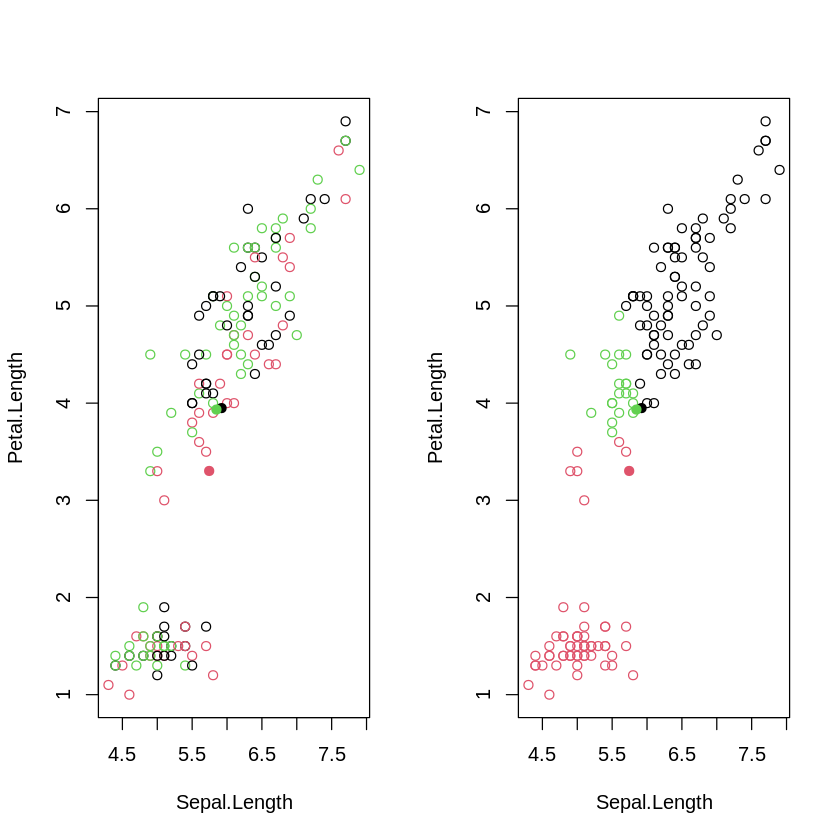

In [ ]:
par(mfrow = c(1, 2))
plot(x, col = init)
centres <- sapply(1:3, function(i) colMeans(x[init == i, ], )) # Calculate the centroids (mean) for each of the three clusters based on the initial assignments
                                                               # The "sapply" function is used to apply the "colMeans" function to each cluster
centres <- t(centres)
points(centres[, 1], centres[, 2], pch = 19, col = 1:3) # Transpose the "centres" matrix to have cluster centroids as columns

tmp <- dist(rbind(centres, x)) # Calculate the Euclidean distances between the cluster centroids and all data points. It combines the cluster centroids and data points using "rbind."
tmp <- as.matrix(tmp)[, 1:3] # Convert the distance matrix to a regular matrix and selects only the first three columns

ki <- apply(tmp, 1, which.min) # For each data point, find the index of the nearest cluster centroid based on the distances
ki <- ki[-(1:3)] # Remove the first three elements from the "ki" vector because they correspond to the cluster centroids

plot(x, col = ki)
points(centres[, 1], centres[, 2], pch = 19, col = 1:3) # Add the cluster centroids to the plot with different colors

k-means iteration: calculate centers (left) and assign new cluster membership (right)

**Termination:** Repeat iteration until no point changes its cluster membership

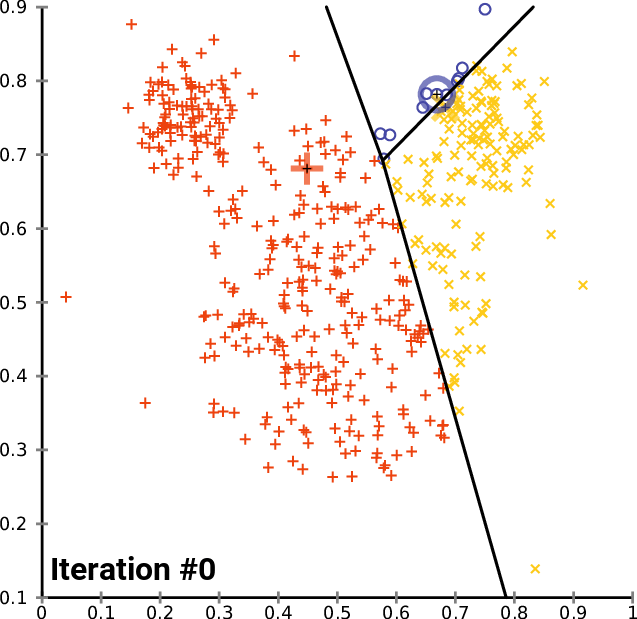

k-means convergence (credit Wikipedia)

##4. Model selection
Due to the random initialisation, one can obtain different clustering results. When k-means is run multiple times, the best outcome, i.e. the one that generates the smallest total within cluster sum of squares (SS), is selected. The total within SS is calculated as:

For each cluster results:

- for each observation, determine the squared euclidean distance from observation to centre of cluster
- sum all distances

Note that this is a **local minimum**; there is no guarantee to obtain a global minimum

**Exercise:**

  Repeat k-means on our x data multiple times, setting the number of iterations to 1 or greater and check whether you repeatedly obtain the same results. Try the same with random data of identical dimensions.

In [ ]:
cl1 <- kmeans(x, centers = 3, nstart = 10) # run k-means clustering on the data x with the kmeans function
# assign data points to one of three clusters. The clustering process is repeated 10 times with different initializations (nstart = 10), and the best result is selected

cl2 <- kmeans(x, centers = 3, nstart = 10) # run the same clusting with different initializations
table(cl1$cluster, cl2$cluster) # create a contingency table to compare the cluster assignments from the two runs

   
     1  2  3
  1  0 41  0
  2 51  0  0
  3  0  0 58

In [ ]:
# only one random initialization
cl1 <- kmeans(x, centers = 3, nstart = 1)
cl2 <- kmeans(x, centers = 3, nstart = 1)
table(cl1$cluster, cl2$cluster)

   
     1  2  3
  1 41  0  0
  2  0  0 58
  3  0 51  0

In [ ]:
set.seed(42)
xr <- matrix(rnorm(prod(dim(x))), ncol = ncol(x)) # generate a random matrix xr with the same dimensions as your original data x
                                                  # This matrix contains random values drawn from a normal distribution (mean = 0, standard deviation = 1
cl1 <- kmeans(xr, centers = 3, nstart = 1)
cl2 <- kmeans(xr, centers = 3, nstart = 1)
table(cl1$cluster, cl2$cluster)

   
     1  2  3
  1  0 52  0
  2  0  0 46
  3 52  0  0

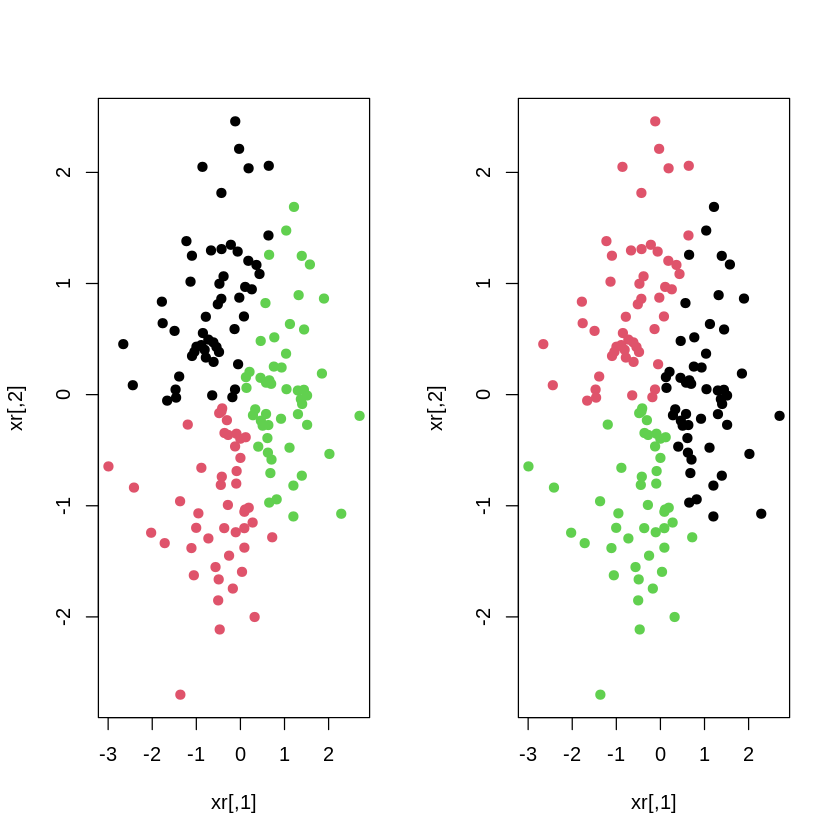

In [ ]:
diffres <- cl1$cluster != cl2$cluster # compute a logical vector diffres, which contains TRUE for data points that have different
                                      # cluster assignments between cl1 and cl2 and FALSE for data points with consistent assignments
par(mfrow = c(1, 2)) # plot a grid with one row and two columns to create two side-by-side plots
plot(xr, col = cl1$cluster, pch = ifelse(diffres, 19, 1))
# The col argument specifies the cluster assignments from cl1, and the pch argument changes the point characters to filled circles (character 19)
# for data points with different assignments (diffres == TRUE) and open circles (character 1) for data points with consistent assignments

plot(xr, col = cl2$cluster, pch = ifelse(diffres, 19, 1))
# The col argument specifies the cluster assignments from cl2, and the pch argument changes the point characters to filled circles (character 19)
# for data points with different assignments (diffres == TRUE) and open circles (character 1) for data points with consistent assignments

Different k-means results on the same (random) data

##5. How to determine the number of clusters

1. Run k-means with `k=1`, `k=2`, …, `k=n`
2. Record total within SS for each value of `k`
3. Choose k at the elbow position, as illustrated below

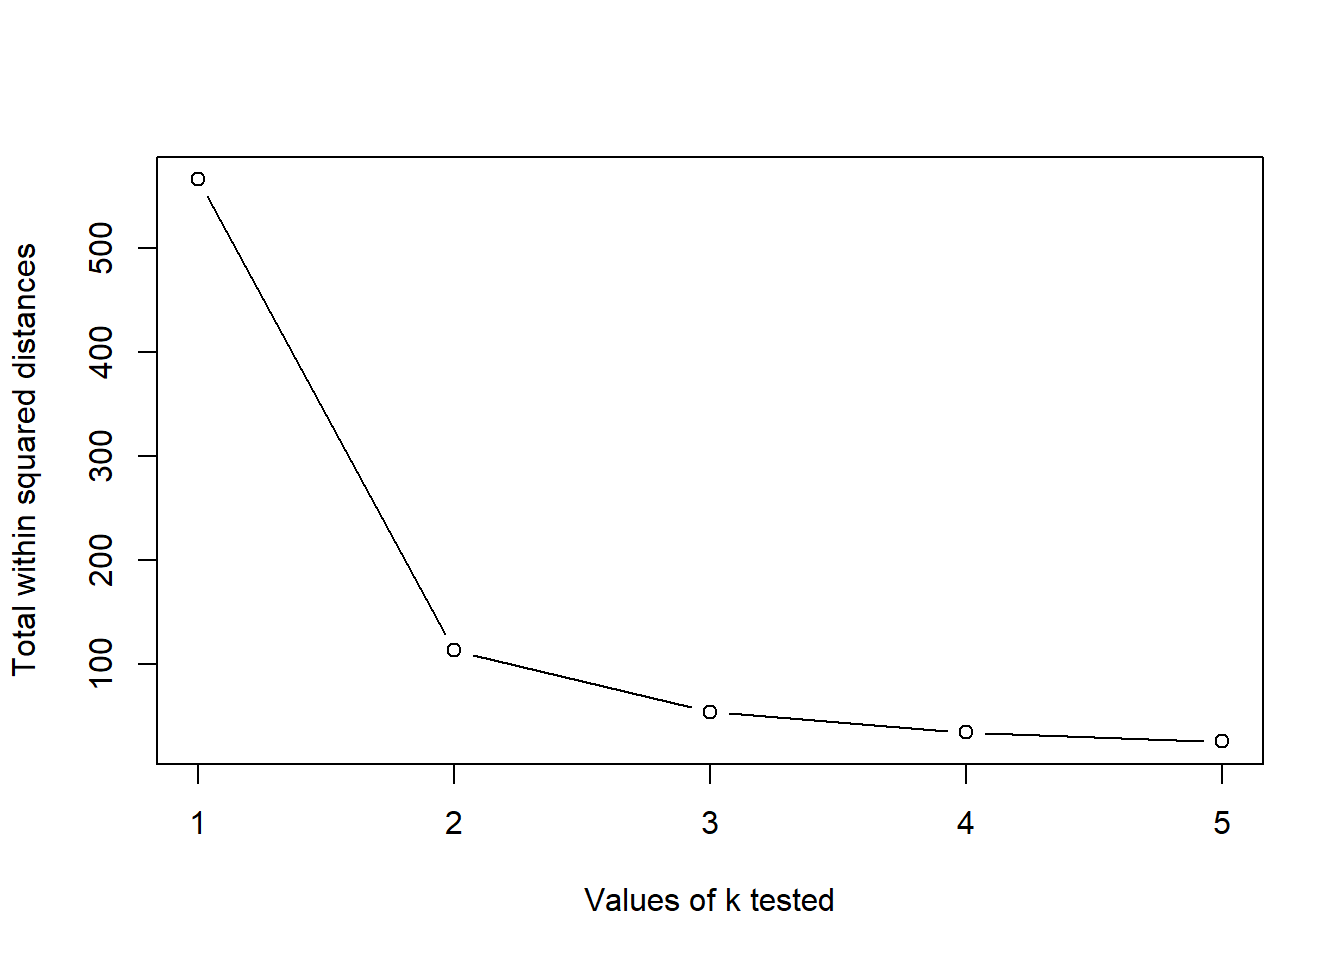

**Exercise**

Calculate the total within sum of squares for k from 1 to 5 for our x test data, and reproduce the figure above.

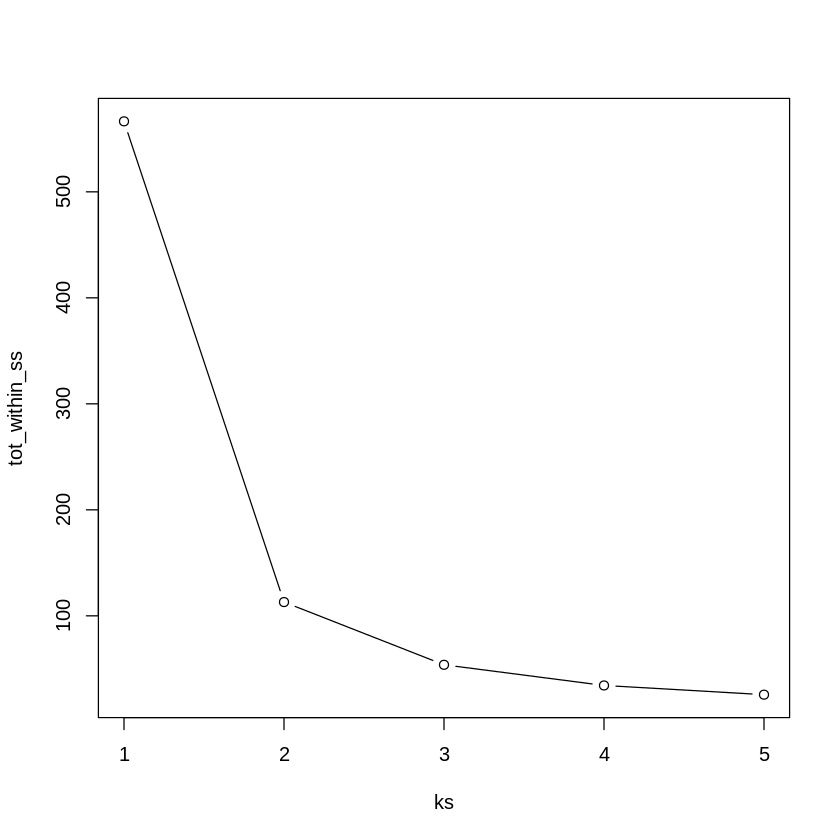

In [ ]:
ks <- 1:5 # create a vector ks containing values from 1 to 5. These values represent the number of clusters (k) you want to use in the k-means algorithm

tot_within_ss <- sapply(ks, function(k) { # use sapply to iterate over each value of k in ks. For each k, you perform k-means clustering on the data x with k clusters,
    cl <- kmeans(x, k, nstart = 10)      # and you calculate the total within-cluster sum of squares (tot.withinss) using cl$tot.withinss.
    cl$tot.withinss                       # The results are stored in the tot_within_ss vector
})
plot(ks, tot_within_ss, type = "b") # create a plot with k values on the x-axis and the corresponding total withinss values on the y-axis
                                    # The type = "b" argument specifies that you want to connect the points with lines, creating a "b" (for "both") type of plot

##6. Hierarchical clustering

###**How does hierarchical clustering work**

**Initialisation**: Starts by assigning each of the n points its own cluster

**Iteration**

1. Find the two nearest clusters, and join them together, leading to n-1 clusters
2. Continue the cluster merging process until all are grouped into a single cluster

**Termination**: All observations are grouped within a single cluster

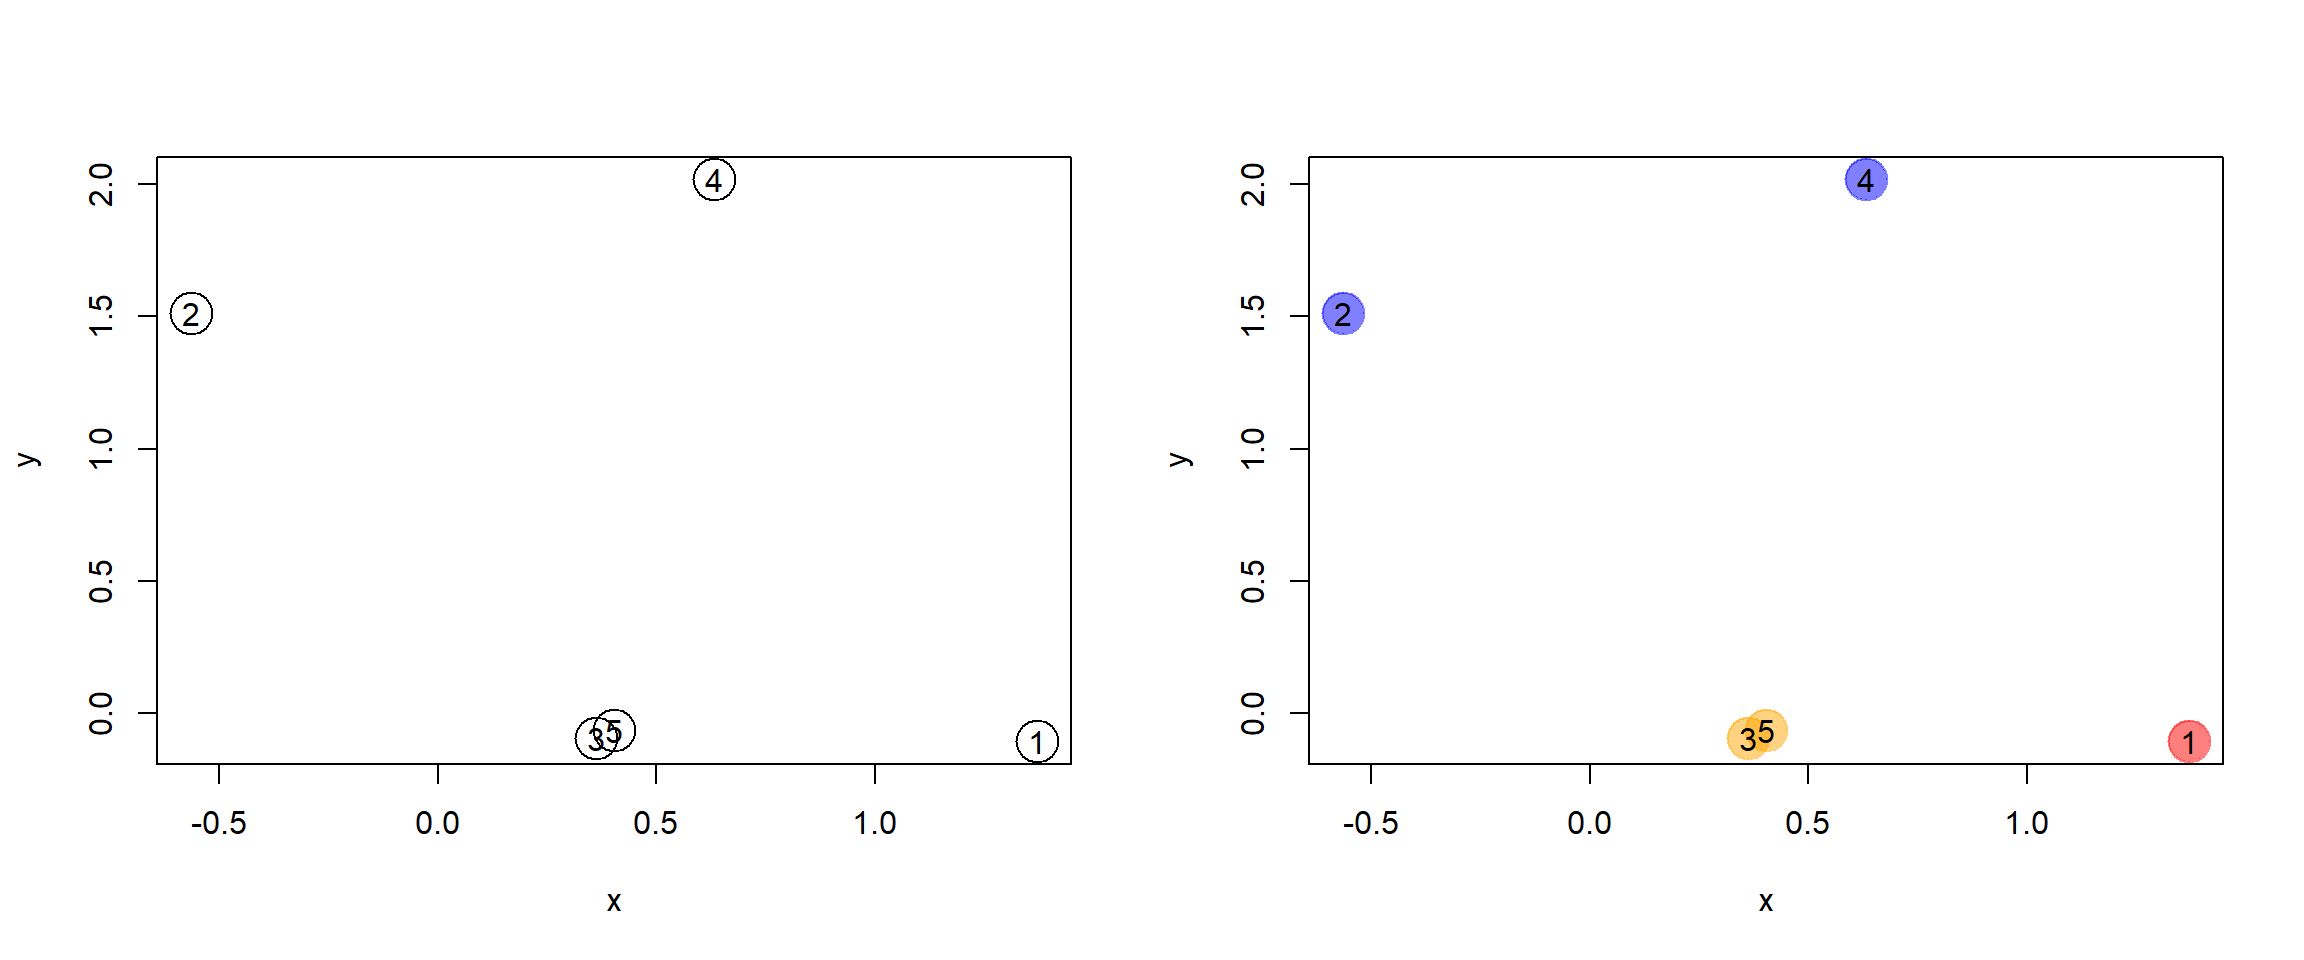

Hierarchical clustering: initialisation (left) and colour-coded results after iteration (right)

The results of hierarchical clustering are typically visualised along a dendrogram, where the distance between the clusters is proportional to the branch lengths

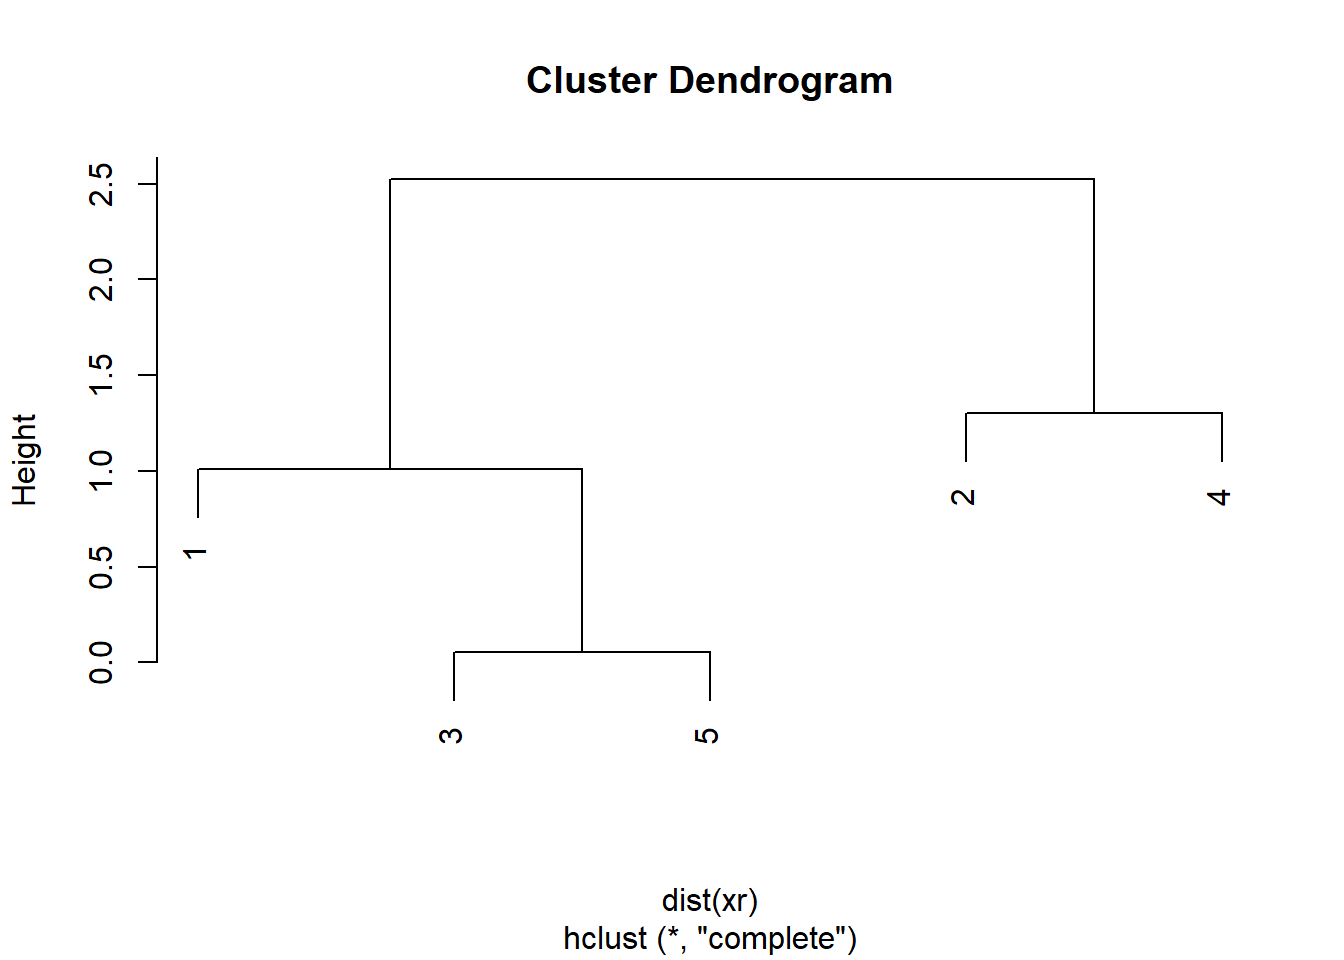

Visualisation of the hierarchical clustering results on a dendrogram

In R:

- Calculate the distance using `dist`, typically the Euclidean distance
- Hierarchical clustering on this distance matrix using `hclust`

**Exercise:**

Apply hierarchical clustering on the `iris` data and generate a dendrogram using the dedicated `plot` method

In [ ]:
d <- dist(iris[, 1:4]) # calculate the Euclidean distances between data points in the first four columns of the Iris dataset (iris[, 1:4]) using the dist function
                       # This creates a distance matrix d, where each element d[i, j] represents the Euclidean distance between data point i and data point j
hcl <- hclust(d) # perform hierarchical clustering on the distance matrix d using the hclust function. The result is a hierarchical clustering tree, known as a dendrogram
hcl # The dendrogram shows how the data points are grouped into clusters at different levels of similarity

# The hclust function is commonly used for agglomerative hierarchical clustering,
# where data points start as individual clusters and are successively merged into larger clusters based on their similarity


Call:
hclust(d = d)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 150 


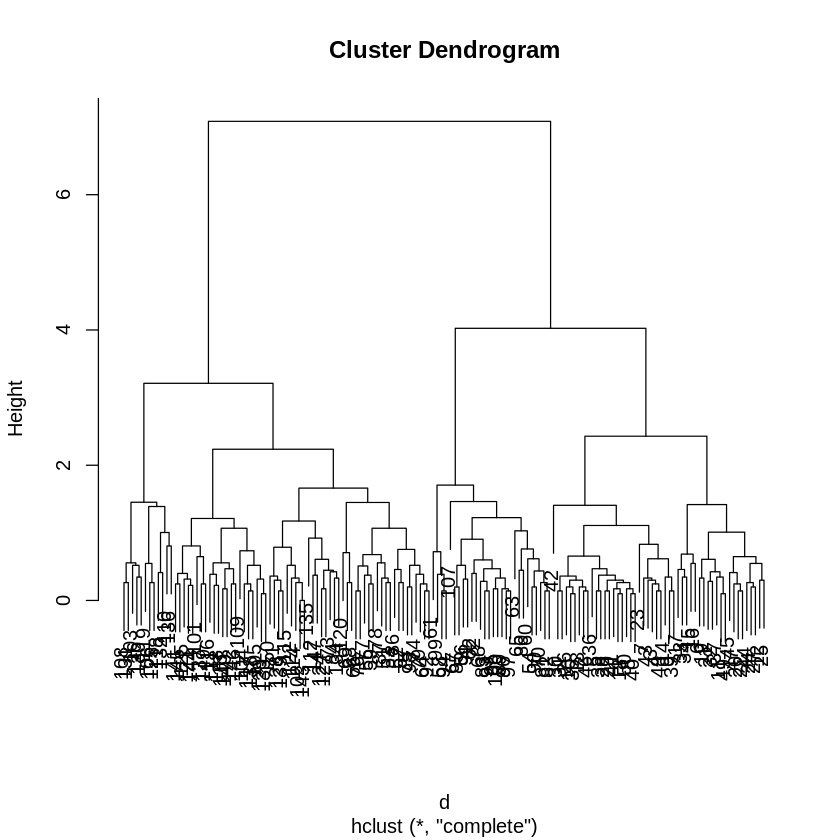

In [ ]:
plot(hcl)

##7. Defining clusters

After producing the hierarchical clustering result, we need to cut the tree (dendrogram) at a specific height to define the clusters

For example, on our test dataset above, we could decide to cut it at a distance around 1.5, which would produce 2 clusters

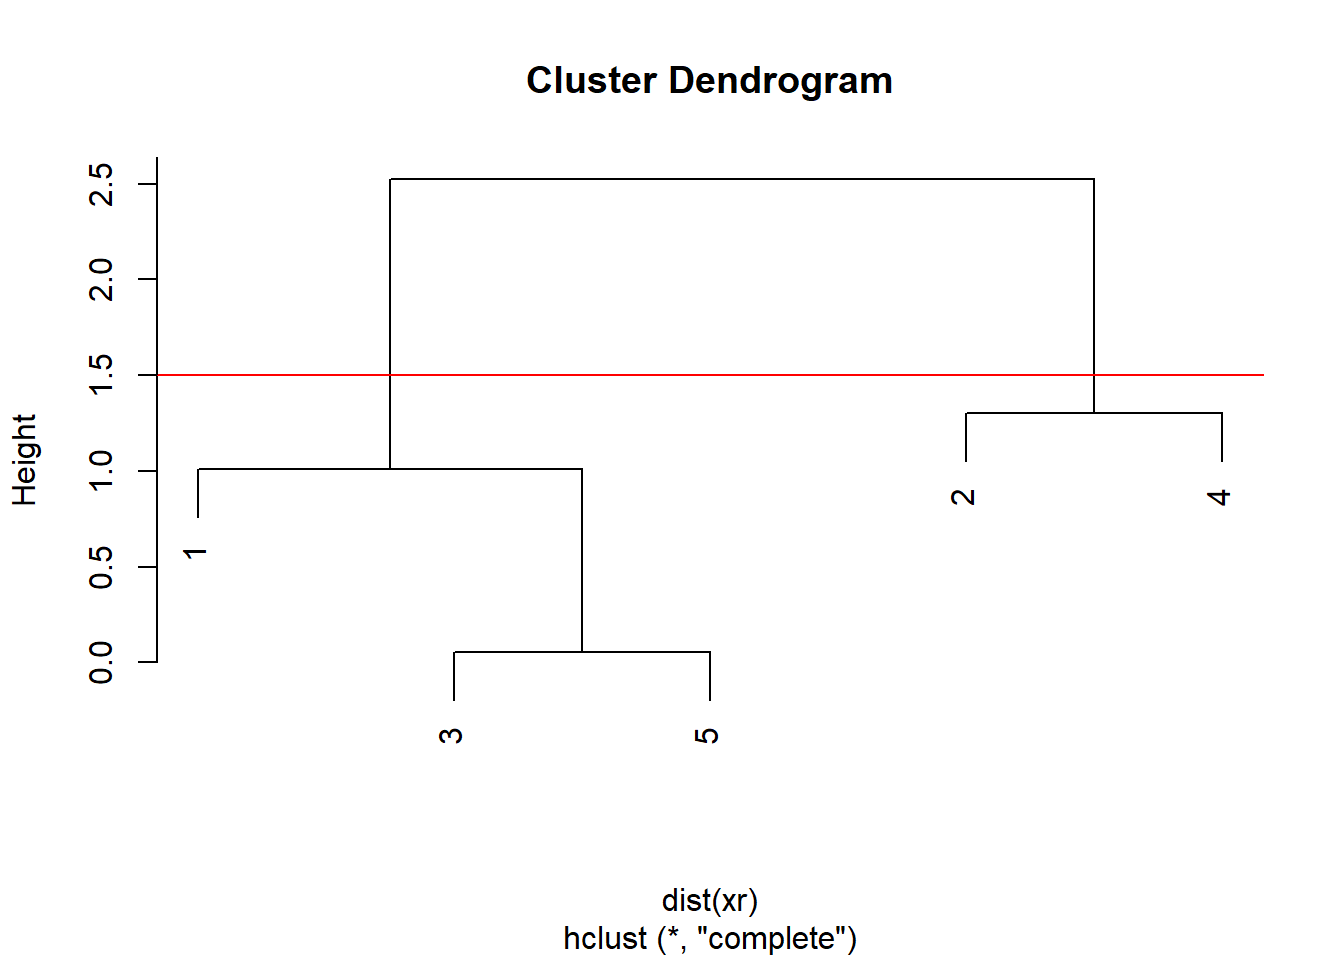

Cutting the dendrogram at height 1.5.

In R we can us the `cutree` function to

- cut the tree at a specific height: `cutree(hcl, h = 1.5)`
- cut the tree to get a certain number of clusters: `cutree(hcl, k = 2)`

**Exercise:**
- Cut the iris hierarchical clustering result at a height to obtain 3 clusters by setting `h`
- Cut the iris hierarchical clustering result at a height to obtain 3 clusters by setting directly `k`, and verify that both provide the same results

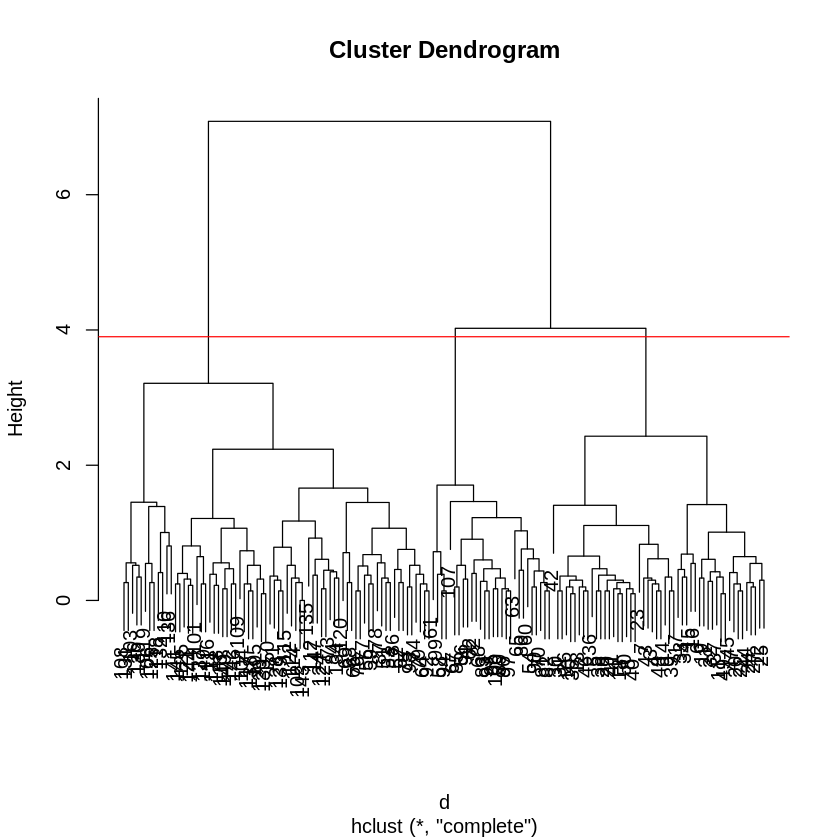

In [ ]:
plot(hcl) # plot the dendrogram created by hierarchical clustering, hcl, using the plot function
abline(h = 3.9, col = "red") # add a horizontal line to the plot

In [ ]:
# The cutree function in R is used to cut a hierarchical clustering tree (dendrogram) into a specified number of clusters
cutree(hcl, k = 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

In [ ]:
cutree(hcl, h = 3.9)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

In [ ]:
# The R function identical is used to compare if two objects are identical. It checks whether the two arguments provided are exactly the
# same in terms of their values, attributes, and structure. If they are identical, it returns TRUE; otherwise, it returns FALSE
identical(cutree(hcl, k = 3), cutree(hcl, h = 3.9))

[1] TRUE

**Exercise:**

Using the same value `k = 3`, verify if k-means and hierarchical clustering produce the same results on the iris data.

Which one, if any, is correct?

In [ ]:
km <- kmeans(iris[, 1:4], centers = 3, nstart = 10) # perform k-means clustering on the first four columns of the Iris dataset (features Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width) to create three clusters

hcl <- hclust(dist(iris[, 1:4])) # perform hierarchical clustering (agglomerative clustering) on the same dataset using Euclidean distance as the dissimilarity measure

table(km$cluster, cutree(hcl, k = 3)) # a contingency table is created. The rows correspond to the cluster assignments obtained from k-means (km$cluster),
                                      # and the columns correspond to the cluster assignments obtained from hierarchical clustering (cutree(hcl, k = 3))
                                      # The table shows how many data points fall into each combination of clusters between the two methods, allowing you to compare their results

   
     1  2  3
  1 50  0  0
  2  0 34 28
  3  0 38  0

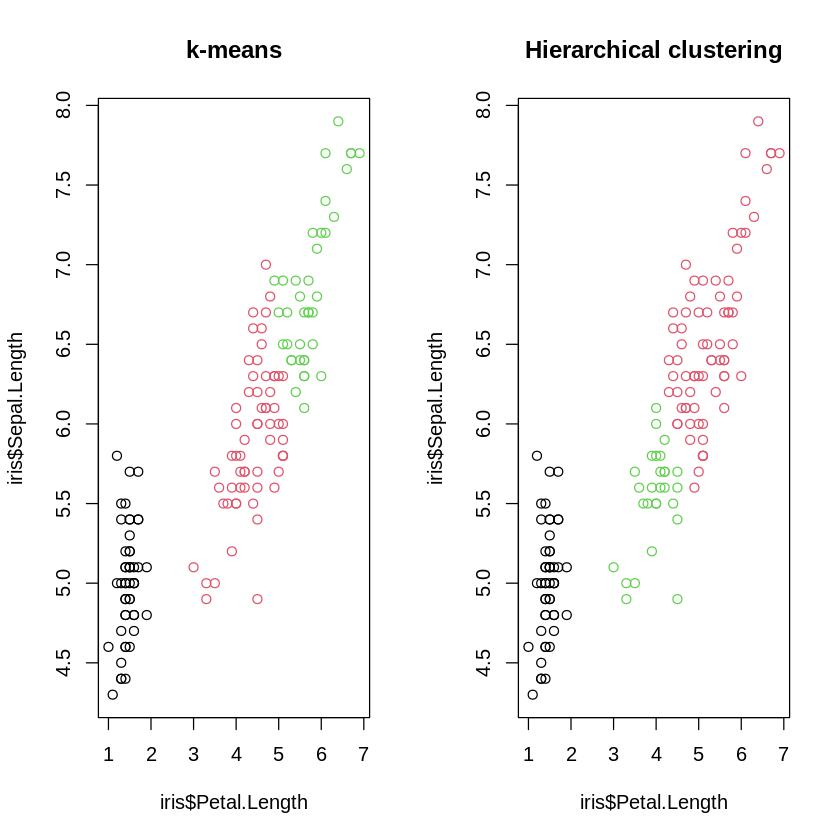

In [ ]:
par(mfrow = c(1, 2))
plot(iris$Petal.Length, iris$Sepal.Length, col = km$cluster, main = "k-means") # uses the Petal.Length on the x-axis and Sepal.Length on the y-axis. The colors of the points are determined by the cluster assignments obtained from the k-means clustering
plot(iris$Petal.Length, iris$Sepal.Length, col = cutree(hcl, k = 3), main = "Hierarchical clustering") #uses hierarchical clustering (hcl) to assign colors to the data points. The cutree function is used to cut the hierarchical tree into three clusters

In [ ]:
## Checking with the labels provided with the iris data
table(iris$Species, km$cluster)

# creates a contingency table that shows the cross-tabulation of the actual species labels from the Iris
# dataset and the cluster assignments obtained from the k-means clustering
# It allows you to compare how well the k-means clustering results align with the true species labels

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

In [ ]:
table(iris$Species, cutree(hcl, k = 3))

# create a contingency table that shows the cross-tabulation of the actual species labels from the Iris dataset
# and the cluster assignments obtained from hierarchical clustering
# It allows you to compare how well the hierarchical clustering results align with the true species labels

            
              1  2  3
  setosa     50  0  0
  versicolor  0 23 27
  virginica   0 49  1

# Pre-processing

Many of the machine learning methods that are regularly used are sensitive to different scales

This applies to unsupervised methods as well as supervised methods, as we will see in the next chapter

A typical way to pre-process the data prior to learning is to scale the data, or apply principal component analysis (next section)

Scaling assures that all data columns have a mean of 0 and standard deviation of 1

In R, scaling is done with the `scale` function

**Exercise:**

Using the `mtcars` data as an example, verify that the variables are of different scales, then scale the data

To observe the effect different scales, compare the hierarchical clusters obtained on the original and scaled data

In [ ]:
colMeans(mtcars) # calculate the mean (average) of each column in the mtcars dataset, which is a built-in dataset in R containing information about various car models

# mpg represents the mean miles per gallon.
# cyl represents the mean number of cylinders.
#	disp represents the mean displacement (engine size).
#	hp represents the mean horsepower.
#	drat represents the mean rear axle ratio.
#	wt represents the mean weight of the car.
#	qsec represents the mean 1/4 mile time.
#	vs represents the mean V/S (V-engine vs. straight engine).
#	am represents the mean transmission type (0 = automatic, 1 = manual).
#	gear represents the mean number of forward gears.
#	carb represents the mean number of carburetors.



mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

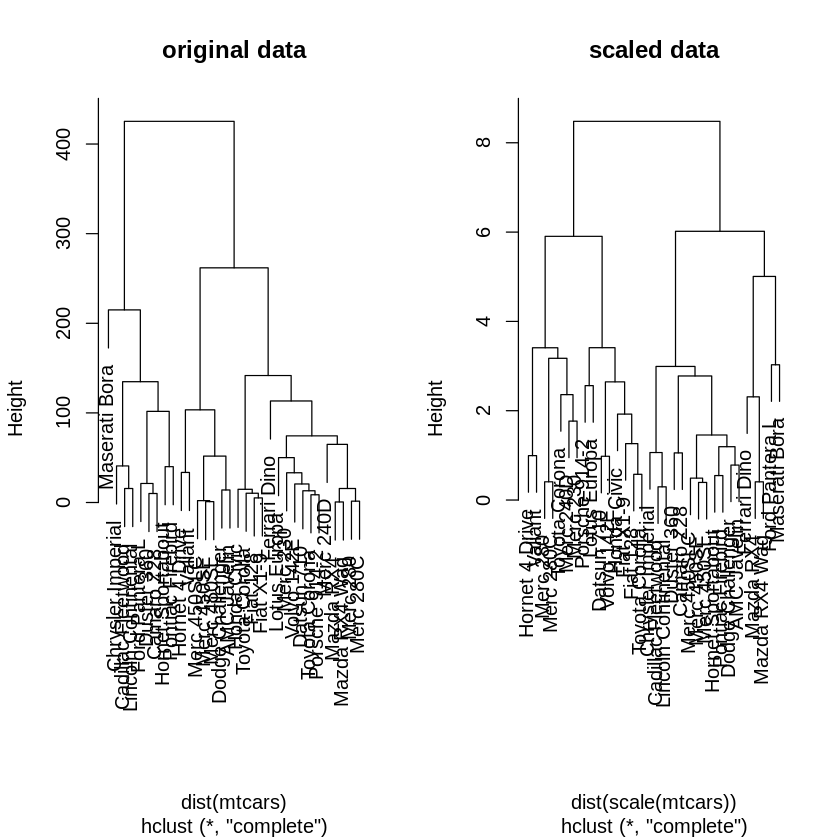

In [ ]:
hcl1 <- hclust(dist(mtcars)) # perform hierarchical clustering on the mtcars dataset without any scaling or standardization
                             # It calculates the dissimilarity (distance) matrix between rows of the mtcars dataset using the Euclidean distance by calling dist(mtcars).

hcl2 <- hclust(dist(scale(mtcars))) # performs hierarchical clustering on the mtcars dataset after standardizing (scaling) the data
                                    # It scales the data by centering it (subtracting the mean) and dividing by the standard deviation for each column using scale(mtcars)
                                    # Then, it calculates the dissimilarity matrix for the scaled data and performs hierarchical clustering
par(mfrow = c(1, 2)) # set up a plotting layout with one row and two columns
plot(hcl1, main = "original data")
plot(hcl2, main = "scaled data")

##8. Principal component analysis (PCA)

**Dimensionality reduction** techniques are widely used and versatile techniques that can be used to:

- find structure in features
- pre-processing for other ML algorithms
- aid in visualisation

The basic principle of dimensionality reduction techniques is to transform the data into a new space that summarise properties of the whole data set along a reduced number of dimensions

These are then ideal candidates used to visualise the data along these reduced number of informative dimensions

### How does it work

Principal Component Analysis (PCA) is a technique that transforms the original n-dimensional data into a new n-dimensional space

- These new dimensions are linear combinations of the original data, i.e. they are composed of proportions of the original variables
- Along these new dimensions, called principal components, the data expresses most of its variability along the first PC, then second, …
- Principal components are orthogonal to each other, i.e. non-correlated

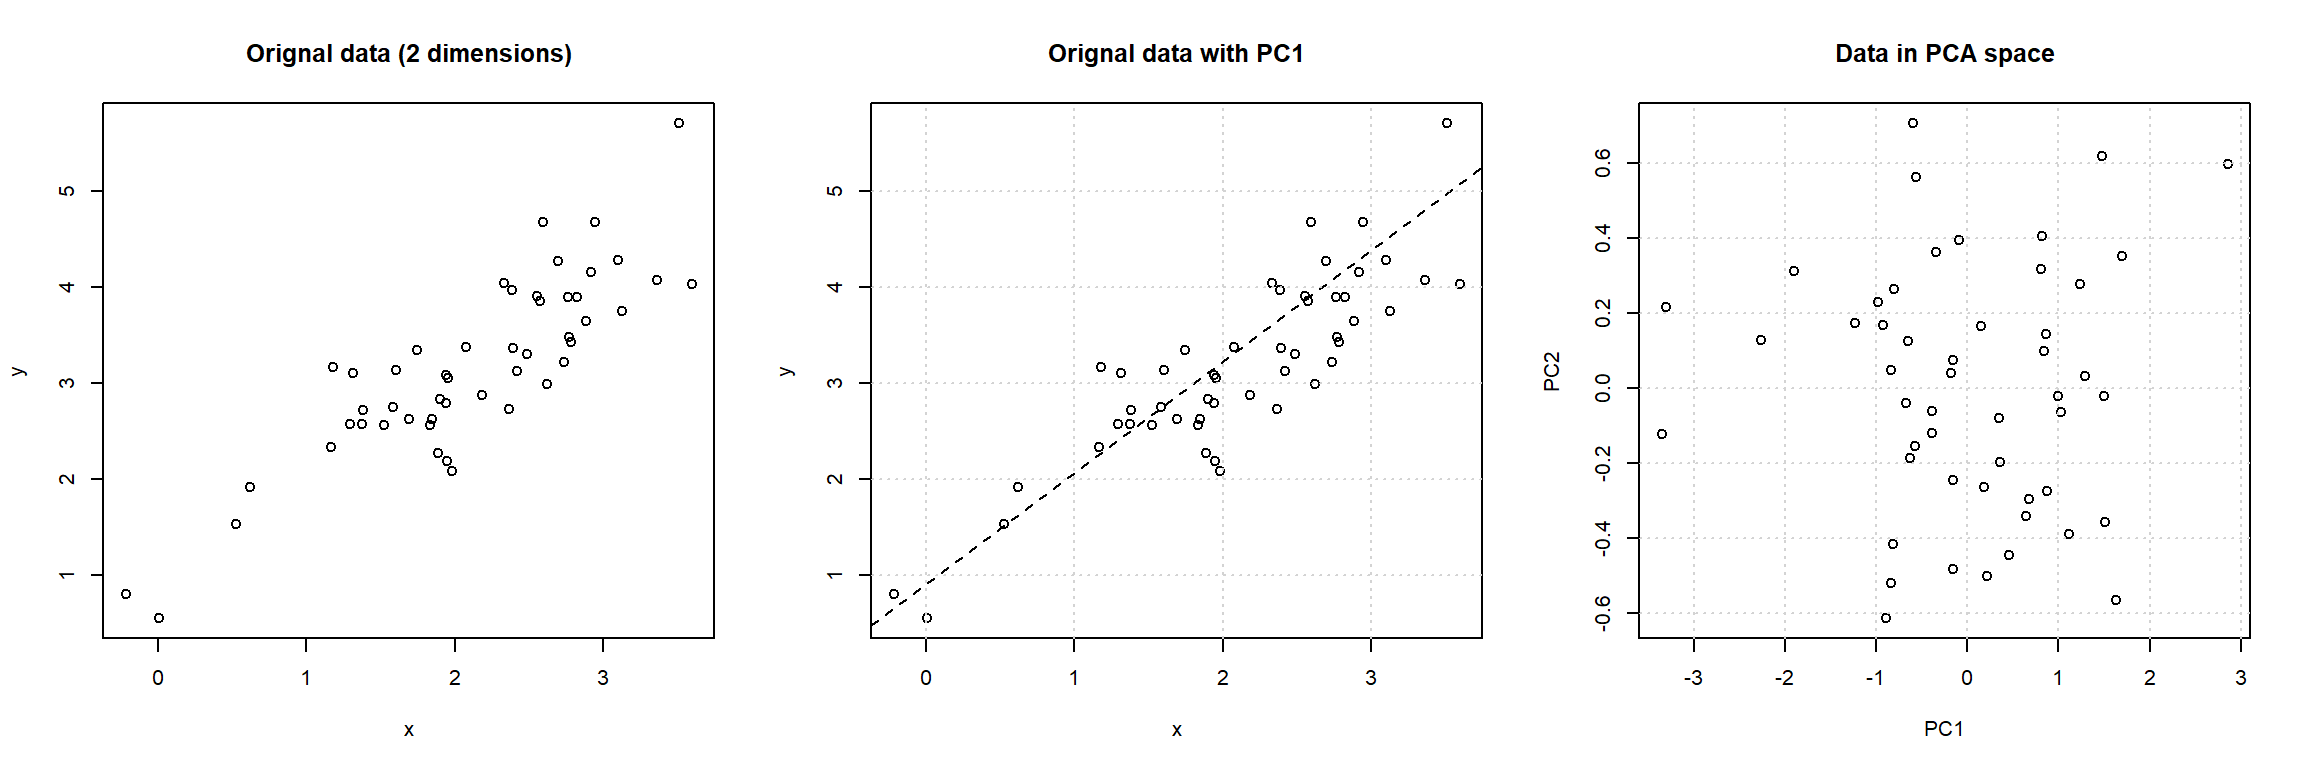

Original data (left). PC1 will maximise the variability while minimising the residuals (centre). PC2 is orthogonal to PC1 (right).

In R, we can use the prcomp function

Let’s explore PCA on the `iris` data. While it contains only 4 variables, is already becomes difficult to visualise the 3 groups along all these dimensions

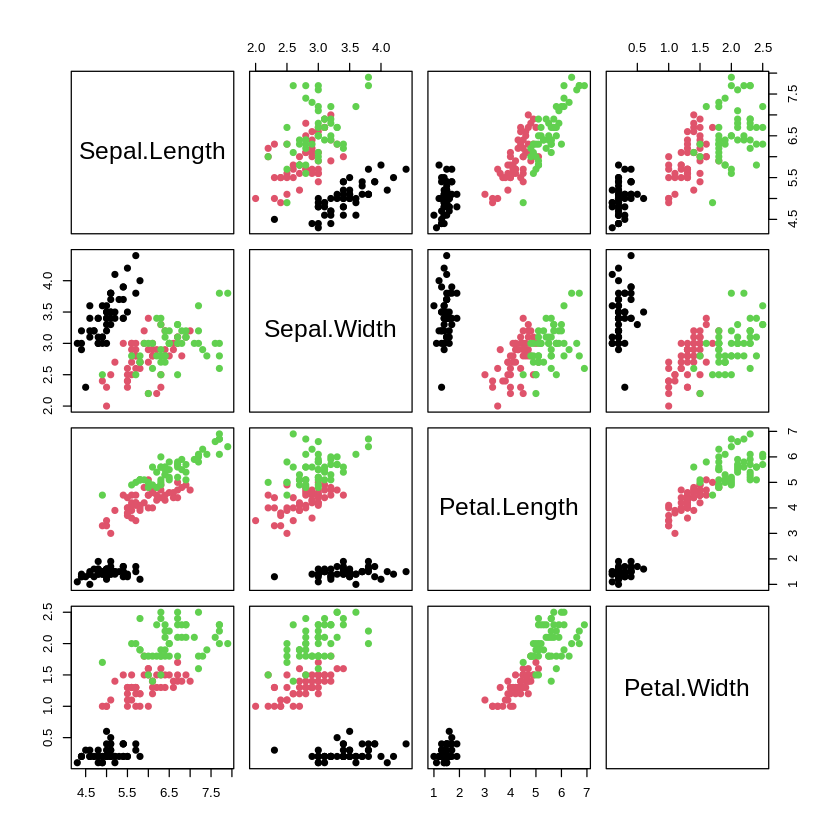

In [ ]:
pairs(iris[, -5], col = iris[, 5], pch = 19)

Let’s use PCA to reduce the dimension

In [ ]:
irispca <- prcomp(iris[, -5])
summary(irispca)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

A summary of the `prcomp` output shows that along PC1 along, we are able to retain over 92% of the total variability in the data

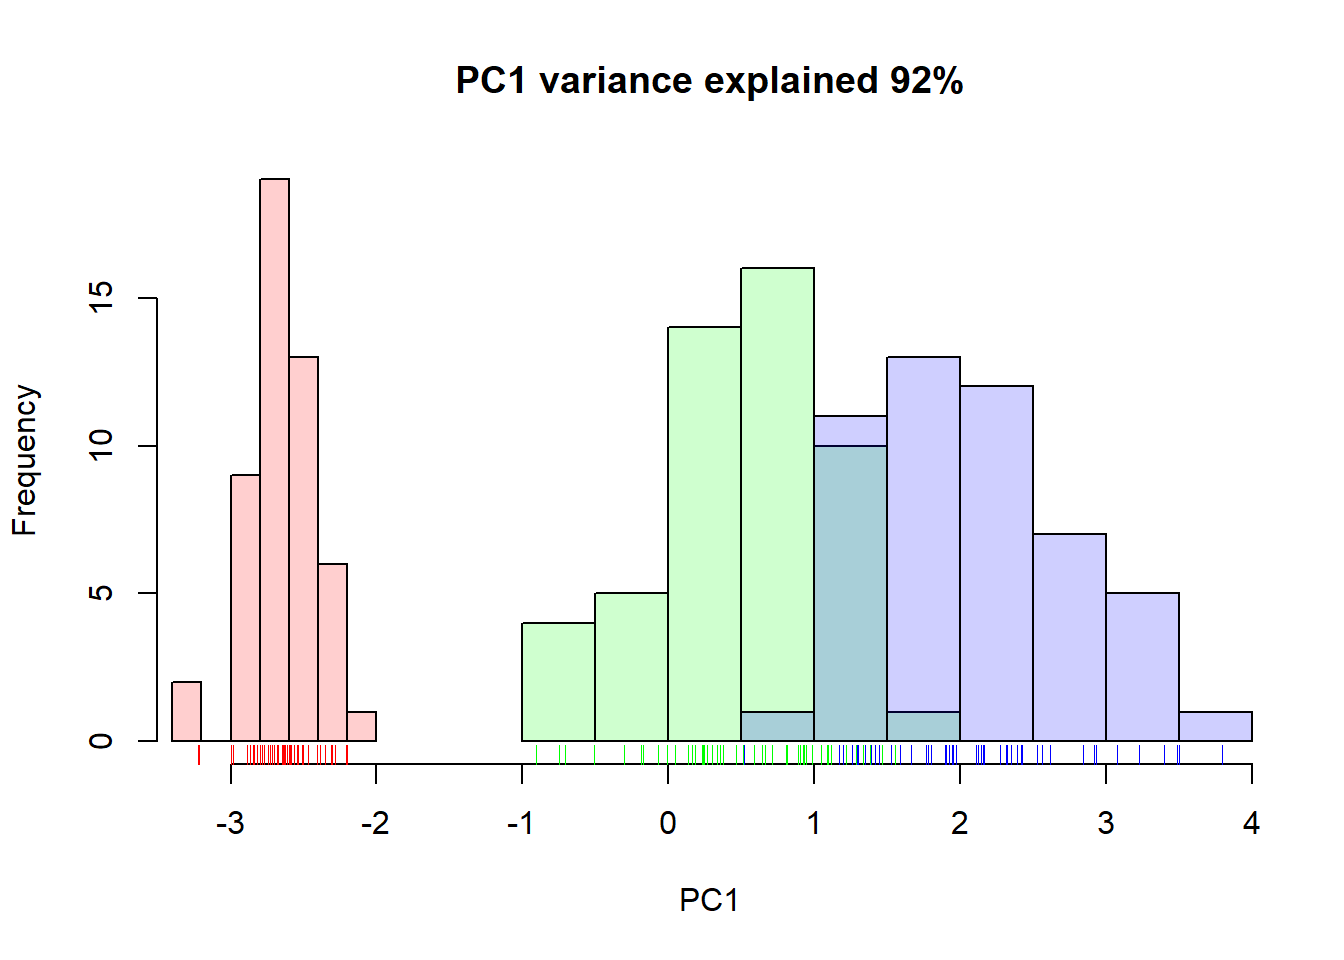

Iris data along PC1

##9. Visualisation
A **biplot** features all original points re-mapped (rotated) along the first two PCs as well as the original features as vectors along the same PCs. Feature vectors that are in the same direction in PC space are also correlated in the original data space

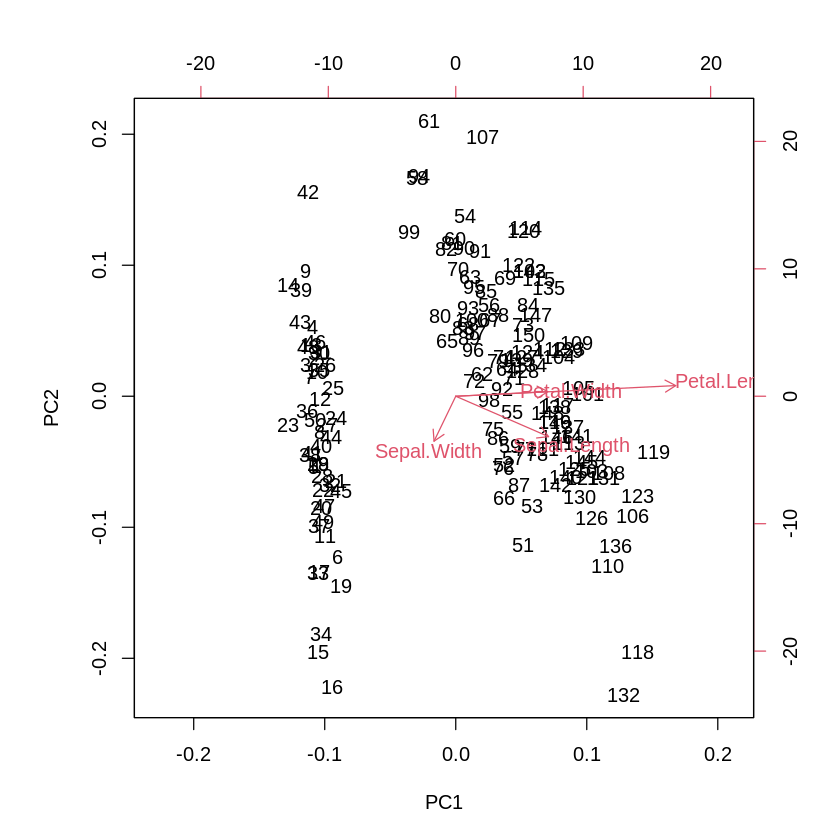

In [ ]:
biplot(irispca)

One important piece of information when using PCA is the proportion of variance explained along the PCs, in particular when dealing with high dimensional data, as PC1 and PC2 (that are generally used for visualisation), might only account for an insufficient proportion of variance to be relevant on their own.

In the code chunk below, I extract the standard deviations from the PCA result to calculate the variances, then obtain the percentage of and cumulative variance along the PCs

In [ ]:
var <- irispca$sdev^2
(pve <- var/sum(var))

[1] 0.924618723 0.053066483 0.017102610 0.005212184

In [ ]:
cumsum(pve)

[1] 0.9246187 0.9776852 0.9947878 1.0000000

**Exercise:**
  
- Repeat the PCA analysis on the `iris` dataset above, reproducing the biplot and preparing a barplot of the percentage of variance explained by each PC
- It is often useful to produce custom figures using the data coordinates in PCA space, which can be accessed as `x` in the `prcomp` object
- Reproduce the PCA plots below, along PC1 and PC2 and PC3 and PC4 respectively

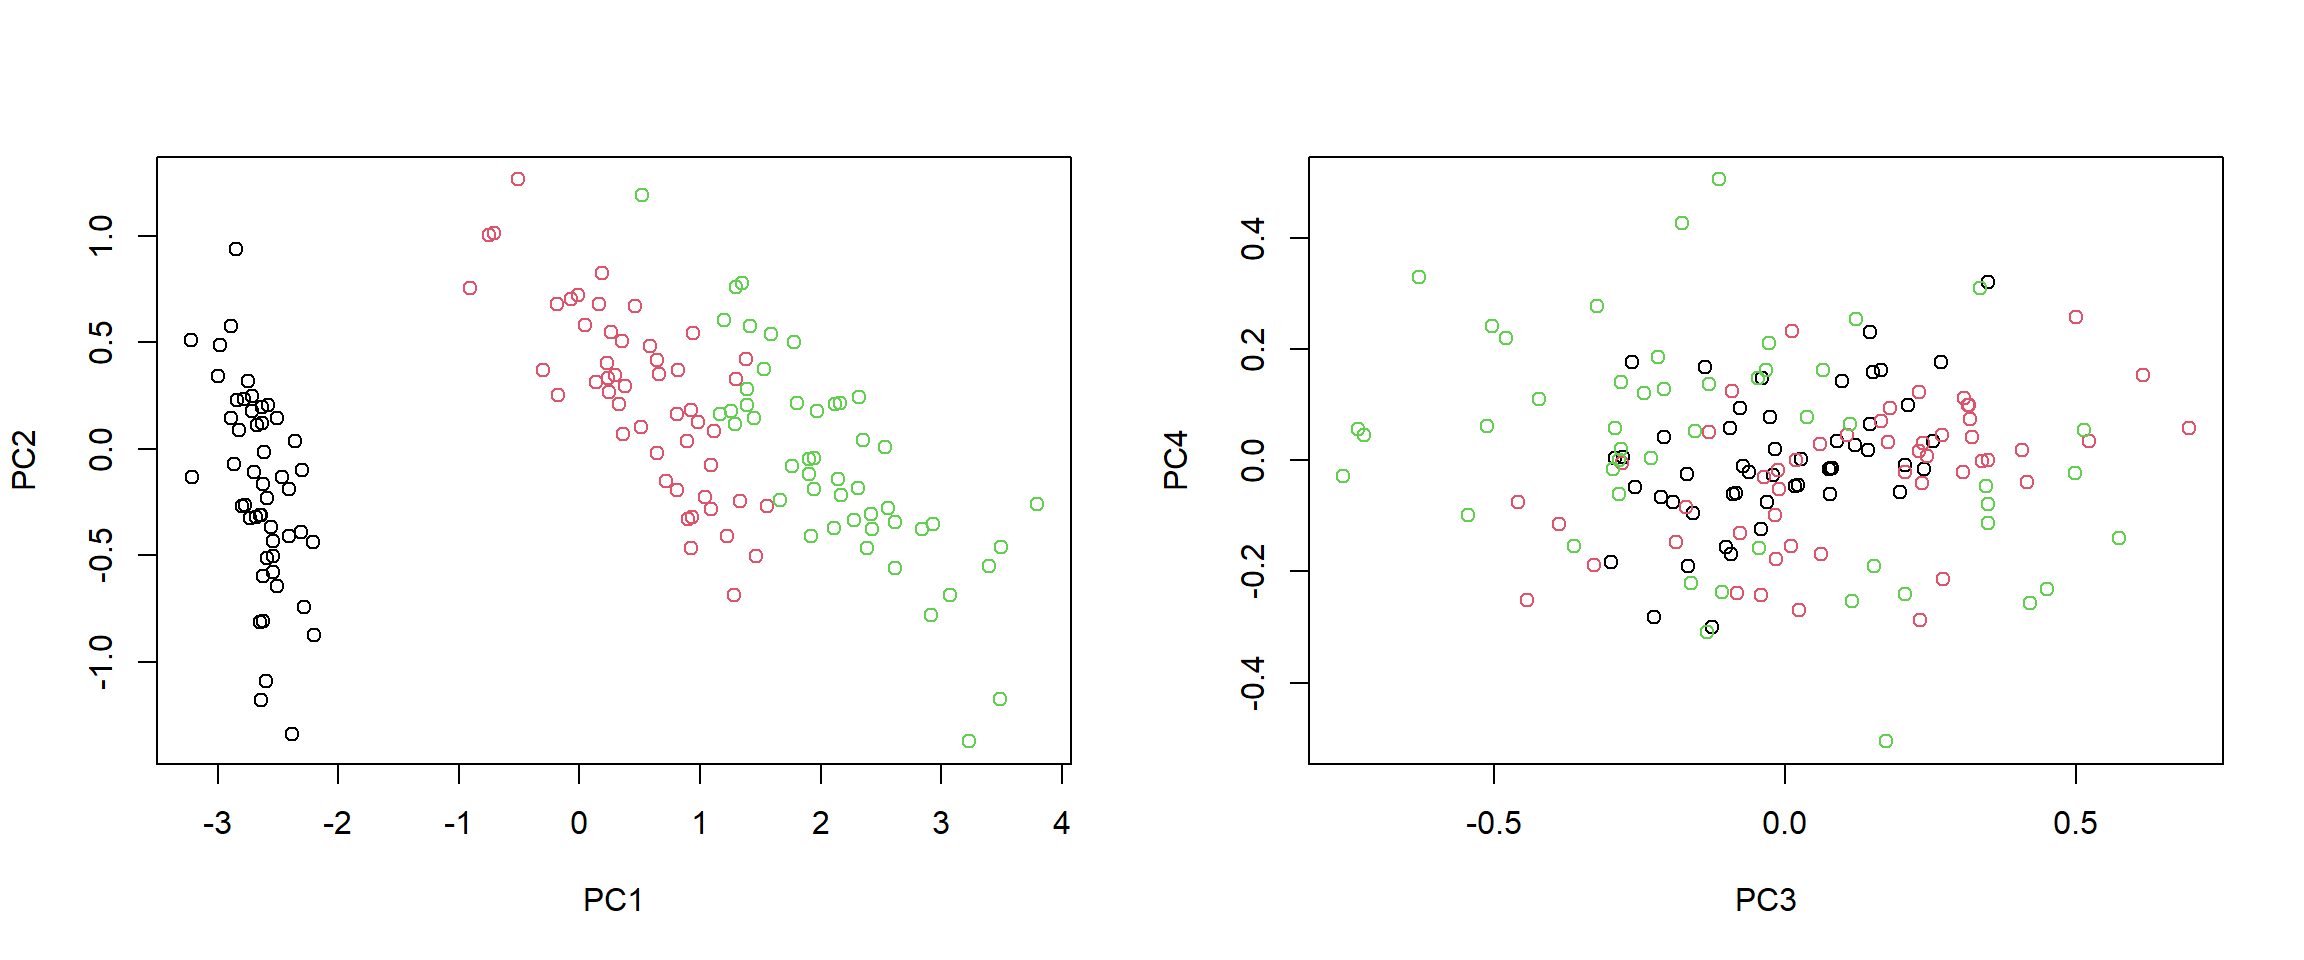

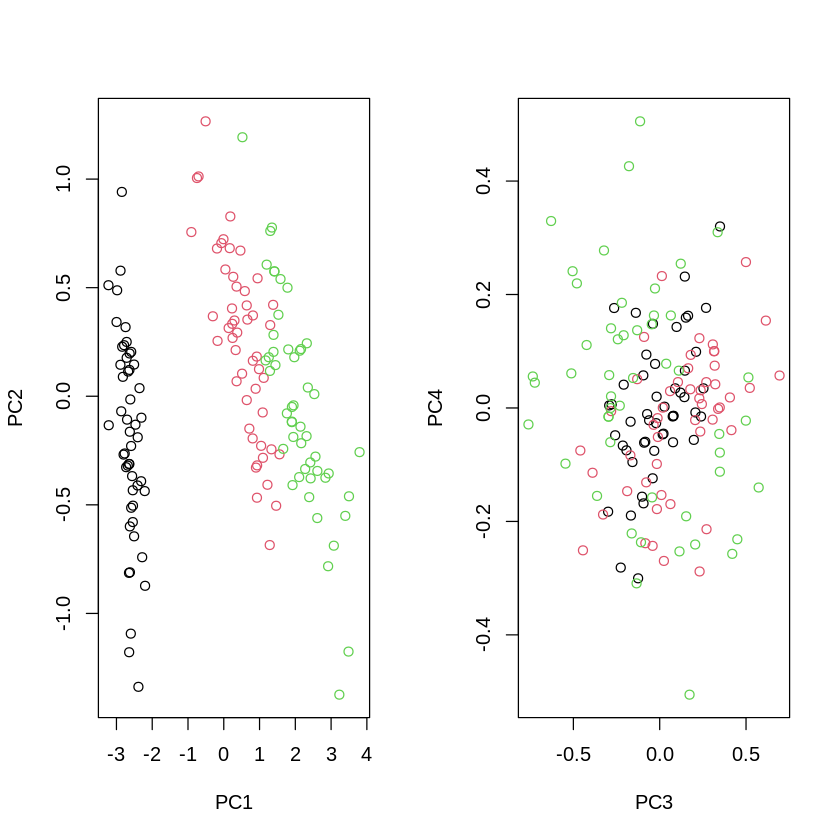

In [ ]:
par(mfrow = c(1, 2))
plot(irispca$x[, 1:2], col = iris$Species)
plot(irispca$x[, 3:4], col = iris$Species)

###Data pre-processing

We haven’t looked at other `prcomp` parameters, other that the first one, `x`

There are two other ones that are or importance, in particular in the light of the section on pre-processing above, which are:
- `center`
- `scale`

The former is set to TRUE by default, while the second one is set the FALSE

**Exercise:**
Repeat the analysis comparing the need for scaling on the `mtcars` dataset, but using PCA instead of hierarchical clustering, when comparing the two

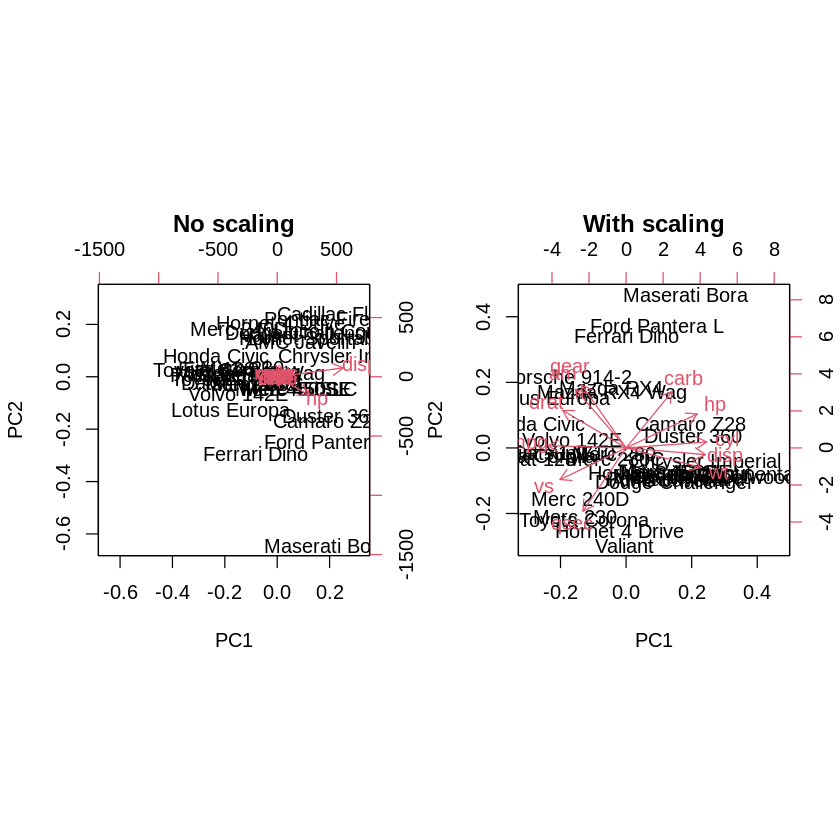

In [ ]:
par(mfrow = c(1, 2))
biplot(prcomp(mtcars, scale = FALSE), main = "No scaling")  ## 1
biplot(prcomp(mtcars, scale = TRUE), main = "With scaling") ## 2

Without scaling, `disp` and `hp` are the features with the highest loadings along PC1 and 2 (all others are negligible), which are also those with the highest units of measurement. Scaling removes this effect.

##10. Final comments on PCA

Real datasets often come with **missing values**

In R, these should be encoded using `NA`

Unfortunately, PCA cannot deal with missing values, and observations containing `NA` values will be dropped automatically. This is a viable solution only when the proportion of missing values is low

It is also possible to impute missing values. This is described in greater details in the Data pre-processing section in the supervised machine learning chapter.

Finally, we should be careful when using categorical data in any of the unsupervised methods described above

Categories are generally represented as factors, which are encoded as integer levels, and might give the impression that a distance between levels is a relevant measure (which it is not, unless the factors are ordered)

In such situations, categorical data can be dropped, or it is possible to encode categories as binary **dummy variables**

For example, if we have 3 categories, say `A`, `B` and `C`, we would create two dummy variables to encode the categories as:

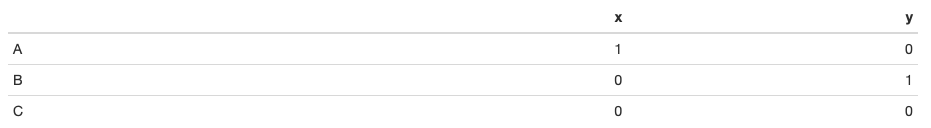

so that the distance between each category are approximately equal to 1

##11. t-Distributed Stochastic Neighbour Embedding

[t-Distributed Stochastic Neighbour Embedding](https://lvdmaaten.github.io/tsne/) (t-SNE) is a non-linear dimensionality reduction technique, i.e. that different regions of the data space will be subjected to different transformations. t-SNE will compress small distances, thus bringing close neighbours together, and will ignore large distances. It is particularly well suited for [very high dimensional data](https://distill.pub/2016/misread-tsne/)

n R, we can use the `Rtsne` function from the CRANpkg(“Rtsne”)

Before, we however need to remove any duplicated entries in the dataset

In [1]:
install.packages("Rtsne")
library("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



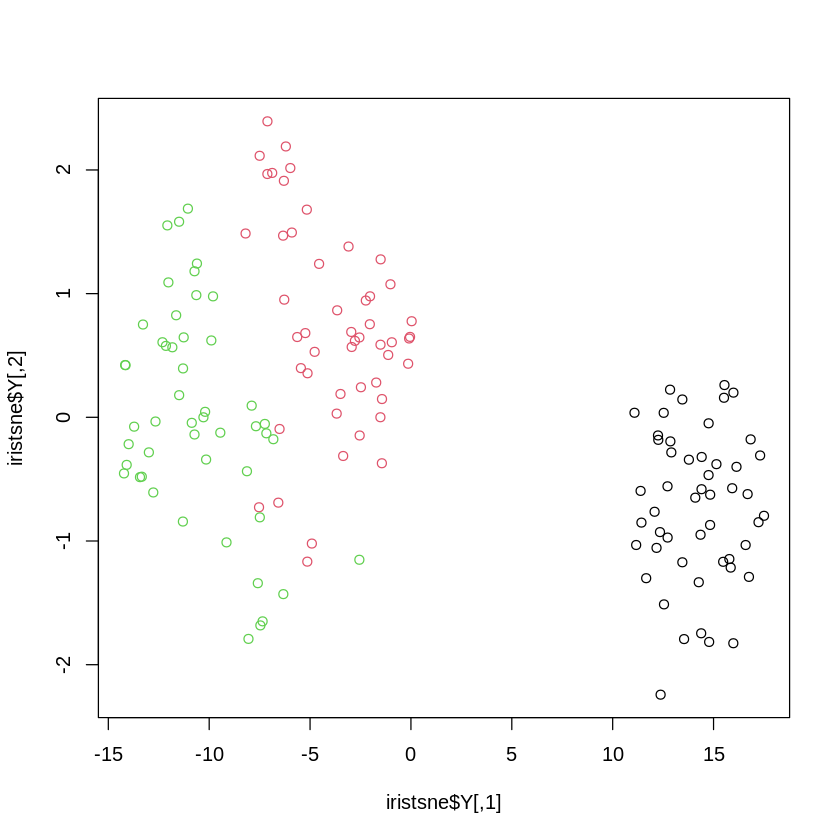

In [2]:
uiris <- unique(iris[, 1:5])
iristsne <- Rtsne(uiris[, 1:4])
plot(iristsne$Y, col = uiris$Species)

As with PCA, the data can be scaled and centred prior the running t-SNE (see the pca_center and pca_scale arguments)

The algorithm is stochastic (randomly determined), and will produce different results at each repetition

### Parameter tuning

t-SNE (as well as many other methods, in particular classification algorithms) has two important parameters that can substantially influence the clustering of the data

- **Perplexity:** balances global and local aspects of the data.
- **Iterations:** number of iterations before the clustering is stopped.
It is important to adapt these for different data. The figure below shows a 5032 by 20 dataset that represent protein sub-cellular localisation

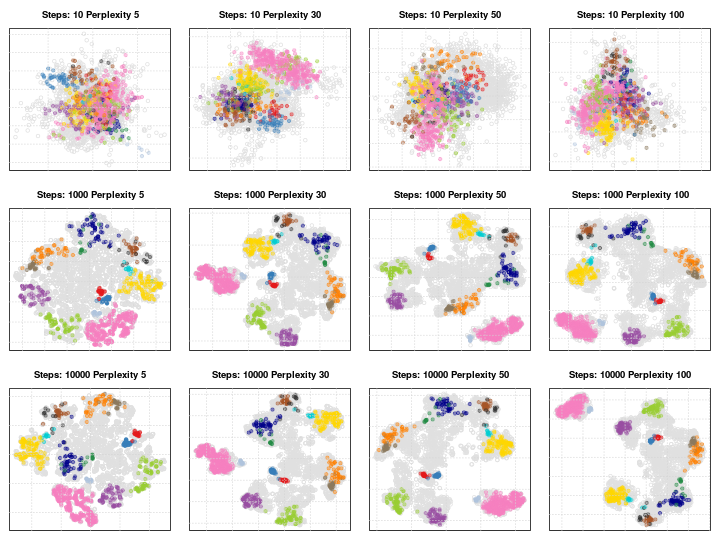

Effect of different perplexity and iterations when running t-SNE

As a comparison, below are the same data with PCA (left) and t-SNE (right)

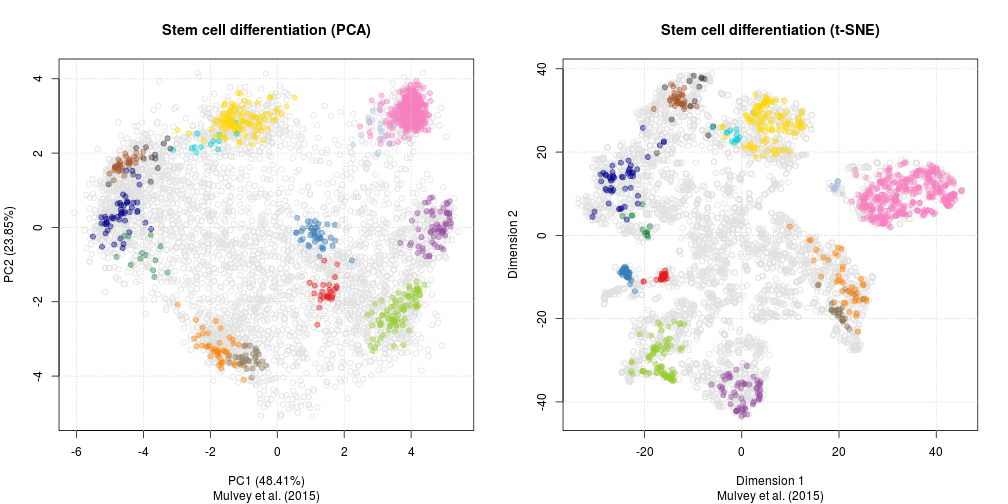

PCA and t-SNE on hyperLOPIT